In [1]:
auth_token = "XXX"

In [2]:
import requests
import pandas as pd

def get_search(offset, auth_token):
    headers = {"authorization": auth_token}
    url = (
        "https://discord.com/api/v9/guilds/349436576037732353"
        "/messages/search"
        "?author_id=501118574656618496"
        "&include_nsfw=true"
        f"&offset={offset}"
    )
    return requests.get(url, headers=headers)

res = get_search(0, auth_token).json()

In [4]:
from tqdm import tqdm
import itertools
import time

messages = []
for i in tqdm(range(40)):
    offset = i * 25
    search = get_search(offset, auth_token)
    messages += list(itertools.chain.from_iterable(search.json()['messages']))
    time.sleep(0.5)
print(len(messages))

  0%|          | 0/40 [00:00<?, ?it/s]

100%|██████████| 40/40 [00:37<00:00,  1.06it/s]

1000


In [5]:
df = pd.DataFrame(messages)
ts_df = df[["timestamp"]].copy()
ts_df["timestamp"] = pd.to_datetime(ts_df["timestamp"])
ts_df["date"] = ts_df["timestamp"].dt.date
ts_df["hour"] = (ts_df["timestamp"].dt.hour + ts_df["timestamp"].dt.minute / 60).round(2)
ts_df.to_csv("2023-08-21-geo.csv", index=False)

In [8]:
ts_df

,timestamp,date,hour
0,2023-08-22 03:35:35.557000+00:00,2023-08-22,3.58
1,2023-08-22 03:29:27.394000+00:00,2023-08-22,3.48
2,2023-08-22 03:29:20.049000+00:00,2023-08-22,3.48
3,2023-08-22 03:28:43.264000+00:00,2023-08-22,3.47
4,2023-08-22 03:28:39.544000+00:00,2023-08-22,3.47
...,...,...,...
995,2023-08-10 05:06:01.702000+00:00,2023-08-10,5.10
996,2023-08-10 05:05:43.019000+00:00,2023-08-10,5.08
997,2023-08-10 05:05:39.109000+00:00,2023-08-10,5.08
998,2023-08-10 05:05:36.577000+00:00,2023-08-10,5.08


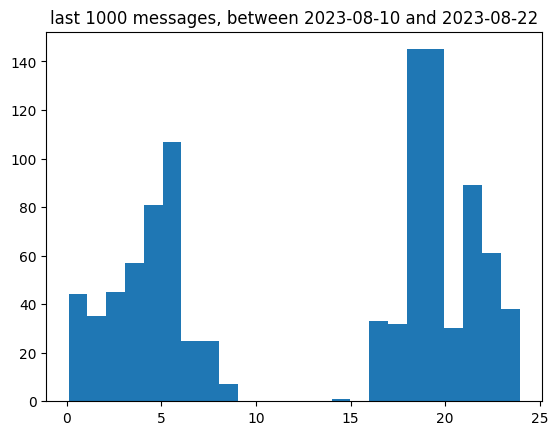

In [12]:
import matplotlib.pyplot as plt

plt.hist(ts_df.hour, bins=24)
plt.title(f"last 1000 messages, between {ts_df.date.min()} and {ts_df.date.max()}")
plt.show()